###CLEANING

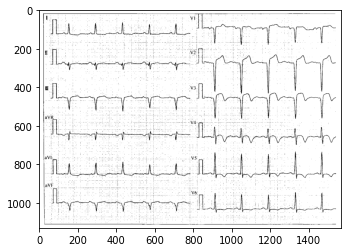

In [ ]:
#  organizing imports 
import cv2          
import numpy as np     
import matplotlib.pyplot as plt
# path to input image is specified and 
# image is loaded with imread command 
image1 = cv2.imread('test.jpg') 
  
# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale 
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
  
# applying Otsu thresholding 
# as an extra flag in binary  
# thresholding      
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)      
  
# the window showing output image          
# with the corresponding thresholding          
# techniques applied to the input image     
plt.imshow(thresh1,cmap="gray")          
       

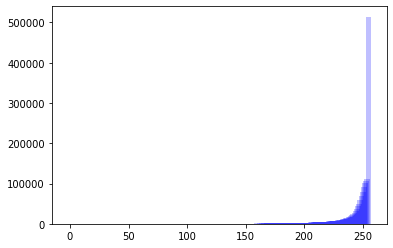

optimal threshold 138


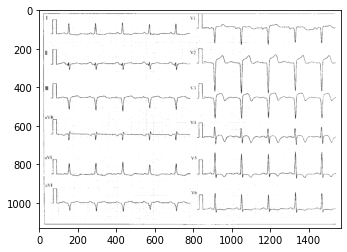

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


threshold_values = {}
h = [1]


def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y



def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i

    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v


def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)

        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))

        V2w = wb * (vb)*(vb) + wf * (vf)*(vf)
        V2b = wb * wf * (mb - mf)**2

        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")

        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")

        if not math.isnan(V2w):
            threshold_values[i] = V2w


def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print ('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]


image = Image.open('test.jpg').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(res,cmap="gray")
plt.savefig("otsu.jpg") 

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('e.png')
img=res
img = np.full((1130,1566), 6, np.uint8)
converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
dst = cv.fastNlMeansDenoisingColored(converted_img,None,10,10,7,21)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#cap = cv.VideoCapture('vtest.avi')
# create a list of first 5 frames
#img = [cap.read()[1] for i in xrange(5)]
# convert all to grayscale
i=res
#gray = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
# convert all to float64
gray = np.float64(i)
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = i+noise 
# Convert back to uint8
noisy = np.uint8(np.clip(i,0,255))
# Denoise 3rd frame considering all the 5 frames
#dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, 1, 4, 7, 5)
dst=cv.fastNlMeansDenoising(noisy,dst,3,7,21)
# plt.subplot(131),plt.imshow(gray,'gray')
# plt.subplot(132),plt.imshow(noisy,'gray')
# plt.subplot(133),plt.imshow(dst,'gray')
# plt.show()

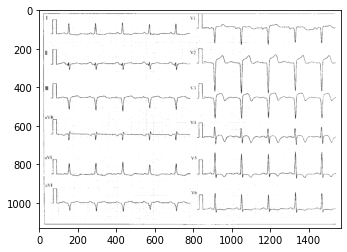

In [ ]:
plt.imshow(gray,'gray')

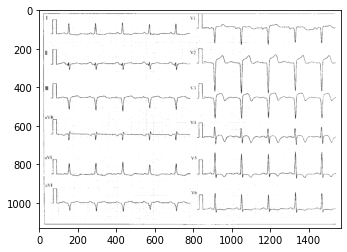

In [ ]:
plt.imshow(noisy,'gray')

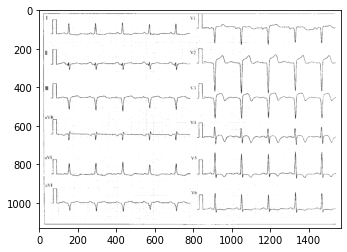

In [ ]:
plt.imshow(dst,'gray')

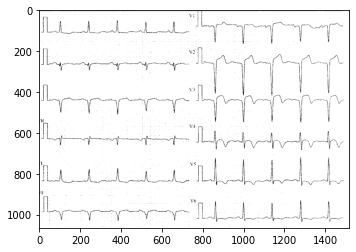

In [ ]:
import cv2
#image = cv2.imread("test.jpg")
image=dst
crop_img = image[15:50+1030, 50:50+1566]
plt.imshow(crop_img,cmap="gray")

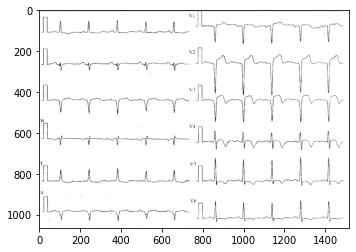

In [ ]:
img=crop_img
for i in range (0,crop_img.shape[0]-10):
  for j in range (0,crop_img.shape[1]-10):
    if img[i][j]==0:
      #check
      count=0
      for k in range (i-5,i+5):
        for l in range (j-5,j+5):
          if img[k][l]==0:
            count=count+1
      if(count<5):
        img[i][j]=255

plt.imshow(img,cmap="gray")

In [ ]:

cv2.imwrite('cleaned.jpg',img)

True

###DIGITIZING

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
i = cv2.imread("cleaned.jpg",0)

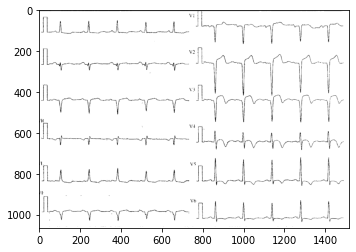

In [ ]:
plt.imshow(i,cmap="gray")

In [ ]:
print(i)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
i.shape

(1065, 1516)

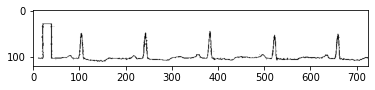

In [ ]:
crop_img = i[5:125, 0:725]
plt.imshow(crop_img,cmap="gray")

In [ ]:
cv2.imwrite('crop.jpg',crop_img)

True

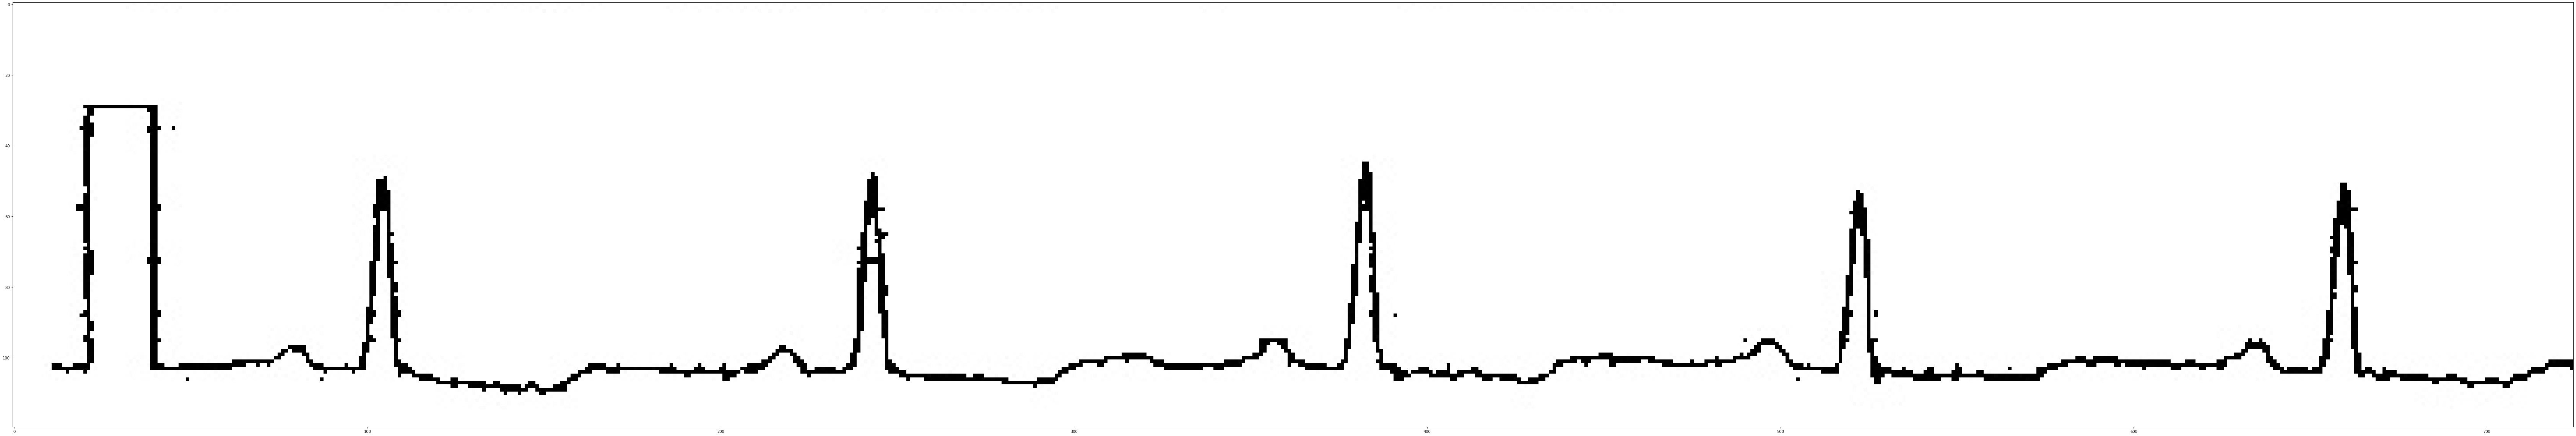

In [ ]:
plt.figure(figsize=(120,725))
plt.imshow(crop_img,cmap="gray")

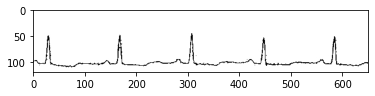

In [ ]:
img = crop_img[:,75:725]
plt.imshow(img,cmap="gray")

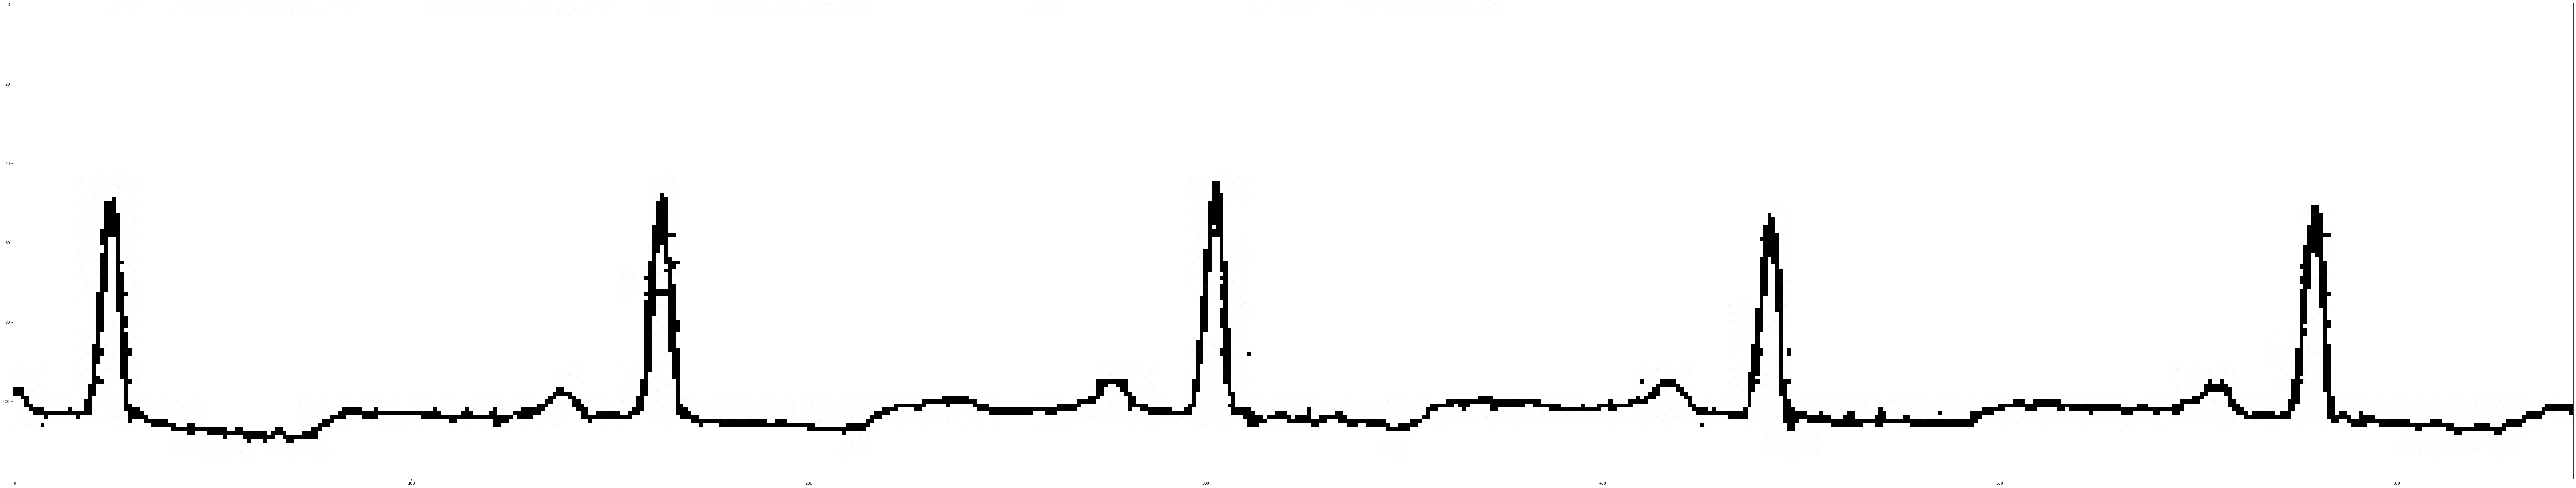

In [ ]:
img = crop_img[:,80:725]
plt.figure(figsize=(120,725))
plt.imshow(img,cmap="gray")

In [ ]:
img.shape

(120, 645)

In [ ]:
pixel_from_top=[]
for i in range (0,645):
  id=0
  
  for j in range (0,120):
      if img[j][i]==0:
        pixel_from_top.append(j)
        id=1
        # print("f\n")
        break
        
  
  if id==0:
    # print("nf\n")
    pixel_from_top.append(pixel_from_top[i-1])

In [ ]:
len(pixel_from_top)

645

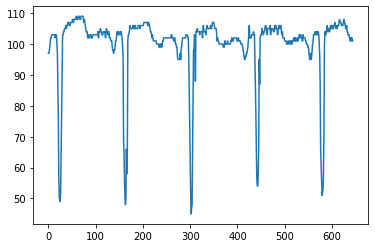

In [ ]:

plt.plot(pixel_from_top)

In [ ]:
pixel_from_bottom=[]
for i in range (0,645):
  pixel_from_bottom.append(120-pixel_from_top[i])

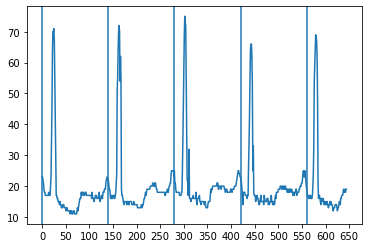

In [ ]:
plt.xticks(range(0,700,50))
for i in range (0,645,140):
  plt.axvline(x=i)
plt.plot(pixel_from_bottom)

In [ ]:
len(pixel_from_bottom)

645